### Titanic Dataset - Exploratory Data Analysis (EDA)
##### Author: Danilo Jelovac  
##### Dataset Source: [Kaggle - M Yasser H.](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data)
---

> *“A grand ship, a tragic story — and a dataset that still teaches us about people, chance, and survival.”*

This project explores the **Titanic dataset**, containing detailed information about the passengers aboard the ill-fated ship.  
The goal is to analyze relationships between passenger attributes and their **survival probability**, visualize insights,  
and prepare data for the upcoming **machine learning phase**.

---


### Table of Contents

1. [Introduction](#introduction)  
2. [Importing Libraries](#importing-libraries)
3. [Loading data and preview](#loading-data-and-preview)
4. [Basic information](#basic-information)  
5. [Data Cleaning, Preprocessing, Feature Engineering](#data-cleaning--preprocessing--feature-engineering)    
6. [Saving the clean daframe](#saving-the-clean-dataframe)  
7. [Conclusions & Next Steps](#conclusions--next-steps)

---

### Introduction

This notebook represents **Part 1: EDA and Cleaning**, focusing on understanding and preparing data for visualization and modeling.  
The Titanic dataset is well-known in the data science community and serves as a great foundation for practicing **data wrangling, feature engineering, and exploratory analysis**.

---

##### `Importing Libraries`

In [1]:
# -------
# Imports:
# -------

try:
    import pandas as pd
    import matplotlib.pyplot as plt

    print("If you see this message, the libraries are uploaded successfuly!")
except ModuleNotFoundError:
    print("Modules not found! Please check if modules are installed.")
    print("Check 'README.md' under 'Requirements' for info.")

If you see this message, the libraries are uploaded successfuly!


##### `Loading data and preview`

In [2]:
# ---------------------------
# Loading and previewing data:
# ---------------------------


# ---------------------------
FOLDER_NAME = 'datasets'
FILE_NAME = 'Titanic-Dataset'
EXTENSION = '.csv'

FILE_PATH = f'../{FOLDER_NAME}/{FILE_NAME}{EXTENSION}'
# ---------------------------

# --Loading and previewing the dataset:
try:
    data = pd.read_csv(FILE_PATH)
    print(f"File from '{FILE_PATH}' loaded!\n")
except FileNotFoundError:
    print(f"File not found! Please check if path is correct: {FILE_PATH}")


print("Previewing data:\n---------------")
display(data.head(5))

File from '../datasets/Titanic-Dataset.csv' loaded!

Previewing data:
---------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### `Basic information`

===== BASIC INFORMATION ======
------------------------------

- Column names -> ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
- Dataframe shape (rows, columns) -> (891, 12)

Number of NaNs:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

------------------------------



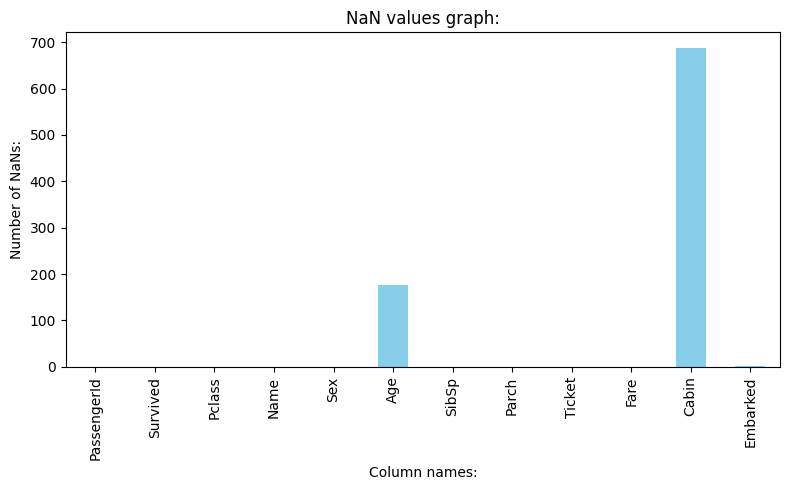

In [3]:
# ----------------------------------------
# Basic information before data processing:
# ----------------------------------------


# --Basic information print:
column_names = []

for column in data.columns:
    column_names.append(column)

print("===== BASIC INFORMATION ======")
print("------------------------------\n")

print(f"- Column names -> {column_names}")
print(f"- Dataframe shape (rows, columns) -> {data.shape}")

print("\nNumber of NaNs:")
display(data.isna().sum())
print("\nData types:")
display(data.dtypes)

print("------------------------------\n")

# --NaNs displayed in graph:
missing_data = data.isna().sum()

plt.figure(figsize=(8, 5))
missing_data.plot(kind='bar', color='skyblue')
plt.title('NaN values graph:')
plt.xlabel('Column names:')
plt.ylabel('Number of NaNs:')
plt.tight_layout()
plt.show()



##### `Data Cleaning, Preprocessing, Feature Engineering`

In [4]:
# -------------------------------
# Cleaning / Fixing the dataframe:
# -------------------------------


# --'Cabin' column % of NaNs:
cabin_nans_pct = data['Cabin'].isna().mean() * 100
print(f"\n>. Column 'Cabin' NaNs %: {cabin_nans_pct:.2f}%.")

# --'Age' column % of NaNs:
age_nans_pct = data['Age'].isna().mean() * 100
data['Age'] = data['Age'].fillna(data['Age'].mean())  # --filling NaNs with avg. value
print(f">. Column 'Age' NaNs %: {age_nans_pct:.2f}%. Filled with avg. values! ")

# --Removing NaN rows from 'Embarked':
data = data.dropna(subset=['Embarked'])

# --Renaming 'Pclass' to avoid confusion:
data = data.rename(columns={'Pclass': 'Class'})

# --Connecting 'SibSp' and 'Parch' into a 'FamilySize' column:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# --Morphing 'FamilySize' into 'FamilyStatus' for binary approach (better visuals):
data['FamilyStatus'] = data['FamilySize'].apply(lambda x: 'single' if x == 1 
                                                           else 'with_family')

# --Getting 'Title' column separated from 'Name':
data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# --Fixing and simplifying 'Title' column:
data['Title'] = data['Title'].replace(['Master', 'Dr', 'Rev', 'Col', 'Major',
                                       'Don', 'Sir', 'Capt', 'Jonkheer'], 'Mr')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace(['Mme', 'Lady', 'the Countess'], 'Mrs')

print("\nFixed 'Title' value count:")
display(data['Title'].value_counts())

# --Survived column change to 'yes' or 'no' for enchanced readability:
data['Survived'] = data['Survived'].apply(lambda x: 'yes' if x == 1
                                                     else 'no')

# --Dropping 'Cabin', 'FamilySize', 'SibSp', 'Parch' and 'Ticket', they are not important:
data = data.drop(columns=['Cabin', 'FamilySize', 'SibSp', 'Parch', 'Ticket'])

# --Fixing column order and previewing data:
data = data[['PassengerId', 'Title', 'Name', 'Sex', 'Age', 'FamilyStatus', 'Class', 'Fare', 'Survived']]

print("\nPreviewing data after cleanup:\n-----------------------------")
display(data.head(5))
print("-----------------------------")

# --Memory optimization:
data['Title'] = data['Title'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['FamilyStatus'] = data['FamilyStatus'].astype('category')

data['Class'] = data['Class'].astype('int8')
data['PassengerId'] = data['PassengerId'].astype('int16')

data['Age'] = data['Age'].astype('float32')
data['Fare'] = data['Fare'].astype('float32')


print("\nData types optimized:")
display(data.dtypes)



>. Column 'Cabin' NaNs %: 77.10%.
>. Column 'Age' NaNs %: 19.87%. Filled with avg. values! 

Fixed 'Title' value count:


Title
Mr      578
Miss    184
Mrs     127
Name: count, dtype: int64


Previewing data after cleanup:
-----------------------------


,PassengerId,Title,Name,Sex,Age,FamilyStatus,Class,Fare,Survived
0,1,Mr,"Braund, Mr. Owen Harris",male,22.0,with_family,3,7.2500,no
1,2,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,with_family,1,71.2833,yes
2,3,Miss,"Heikkinen, Miss. Laina",female,26.0,single,3,7.9250,yes
3,4,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,with_family,1,53.1000,yes
4,5,Mr,"Allen, Mr. William Henry",male,35.0,single,3,8.0500,no


-----------------------------

Data types optimized:


PassengerId        int16
Title           category
Name              object
Sex             category
Age              float32
FamilyStatus    category
Class               int8
Fare             float32
Survived          object
dtype: object

##### `Saving the clean dataframe`

In [5]:
# --------------------
# Saving the dataframe:
# --------------------


# ---------------------------
NEW_FILE_NAME = 'Titanic-Dataset_Cleaned'
# EXTENSION = '.csv'

SAVE_FILE_PATH = f'../{FOLDER_NAME}/{NEW_FILE_NAME}{EXTENSION}'
# ---------------------------

try:
    data.to_csv(SAVE_FILE_PATH, index=False)
    print(f"File '{NEW_FILE_NAME}' saved! Path: '{SAVE_FILE_PATH}'.")
except Exception as e:
    print(f"Someting went wrong... Error: {e}")
    

File 'Titanic-Dataset_Cleaned' saved! Path: '../datasets/Titanic-Dataset_Cleaned.csv'.


---

##### `Overall Verdict`

- This was a very clean dataset overall with a lot of useful data already present.  
- The data manipulation and preprocessing are just there to **compress and clarify the data**,  
     ensuring our visualizations are more precise and our model can learn more effectively.  

---

##### `Next Steps`

- Move to **Part 2: Visualization and Statistical Insights**  
- Explore correlations, survival trends, and visual relationships between variables  
- Prepare for model training (Logistic Regression, Random Forest, etc.)

---

##### `About the Author`

**Danilo Jelovac** — Aspiring Data Analyst & Python Developer  
Focused on clean, understandable code and data-driven storytelling. 
 
> Portfolio: *[[GitHub link](https://github.com/d-jlvc/data-ml-portfolio)]*  
> LinkedIn: *[[LinkedIn link](https://www.linkedin.com/in/danilo-jelovac-b1b7a5396/)]*  